En este notebook lo que haremos será ver patrones y relaciones que tienen las disintas variables entre ellas. Para ello lo primero que haremos ser leer los datos escritos en el notebook anterior.

Montamos drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Cargamos las distintas rutas de los archivos

In [2]:
# Cambiar el directorio de trabajo
%cd '/content/drive/My Drive/tfg/tfg/'

# Mostrar el directorio actual para confirmar el cambio
directorio_actual = %pwd
print("Directorio actual:", directorio_actual)

/content/drive/My Drive/tfg/tfg
Directorio actual: /content/drive/My Drive/tfg/tfg


In [3]:
import os
import pandas as pd
path_actual = os.getcwd()
subdirectorio = 'datas'
file_train = 'df_train.csv'
path_train = os.path.join(path_actual, subdirectorio, file_train)


Leemos y metemos en un dataFrame llamado `df_train` los datos que usaremos para train

In [4]:
import pandas as pd

df_train = pd.read_csv(path_train, index_col=None)
df_train

,eventID,PDGcode,trueE,hitX,hitY,hitZ,hitTime,hitInteg
0,1,211,0.381965,13.5922,2.85275,-18.062,1872.38,1655.0600
1,1,211,0.381965,13.8270,2.79629,-17.893,1878.77,340.1960
2,1,211,0.381965,13.6746,2.74496,-17.677,1876.82,4047.6200
3,1,211,0.381965,13.5436,2.71796,-17.580,1878.30,1234.5500
4,1,211,0.381965,13.3256,2.72527,-17.542,1868.97,1394.2800
...,...,...,...,...,...,...,...,...
11612552,19999,321,0.511779,-26.7600,9.41895,45.739,1362.47,1825.6700
11612553,19999,321,0.511779,-26.8500,9.43314,45.757,1358.16,1862.7900
11612554,19999,321,0.511779,-26.8780,9.51059,46.057,1360.96,1586.2400
11612555,19999,321,0.511779,-26.9210,9.52140,46.063,1357.25,388.8380


Mostramos la matriz de correlacion en train

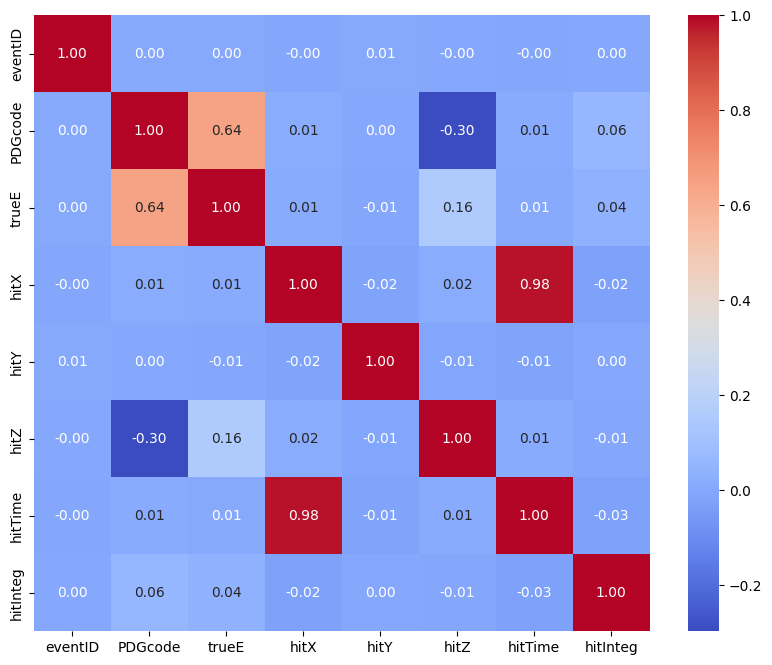

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

matriz_correlacion = df_train.corr()

# Crear un heatmap para visualizar la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Mostrar el gráfico
plt.show()

Como podemos ver en la matriz de correlacion y en el mapa de calor las variables que mas relacion tienen en nuestro caso son las varialbes hitX con hitTime. En este caso, tenemos tanta porcentaje de correlación entre una variable y otra debido a que la distancia en el eje X que viene representado por la variable `hitX` se calcula a partir del tiempo que tarda en detectarse el hit. La forma de calcular la distancia o el tiempo es con la formula $distancia = \cfrac{distancia}{velocidad}$. Por tanto, en el clasificador lo que haremos será eliminar una variable. En nuestro caso, eliminaremos la variable hitTime.

Otra pareja de variables que tiene también un alto indice de correlación son las variables PDGcode y trueE. En nuestro, experimento no podremos usar la variable trueE para clasificar las particulas puesto que en la vida real esta variable no es conocida, nos servirá para evaluar si la selección es mejor a una u otra energía.

Todas las demás su relación es muy pequeña como en el caso de la variavle PGDcode y hitZ y casi nula como en el resto de relaciones entre variables.

En nuestro caso, en la clasificación que vamos a realizar la vamos hacer a partir de la variable PGCcode, es decir el codigo de particula primaria va a ser nuestra etiqueta, por ese motivo nos interesaría que la variable PGCcode tuviera una relación más alta con alguna de las demás variables.

Ahora mostraremos distintos histogramas para conocer las distribuciones de los datos en función de si son kaones o piones.

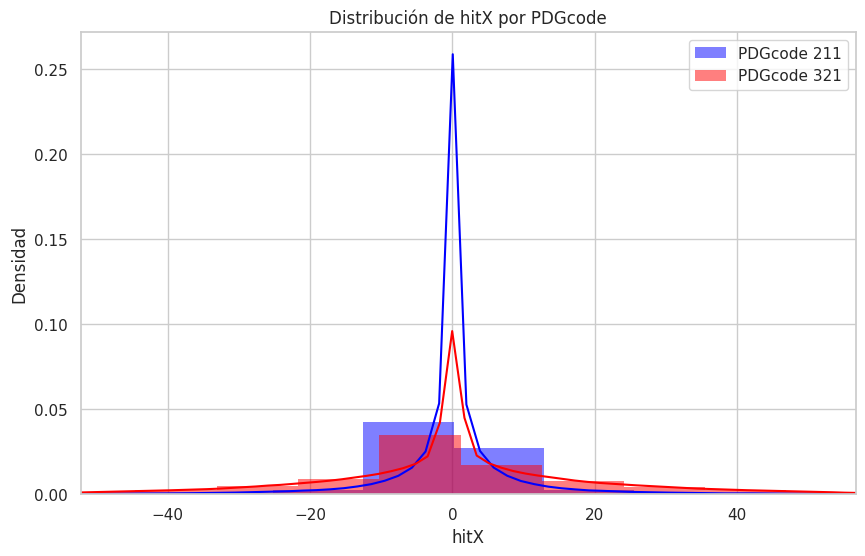

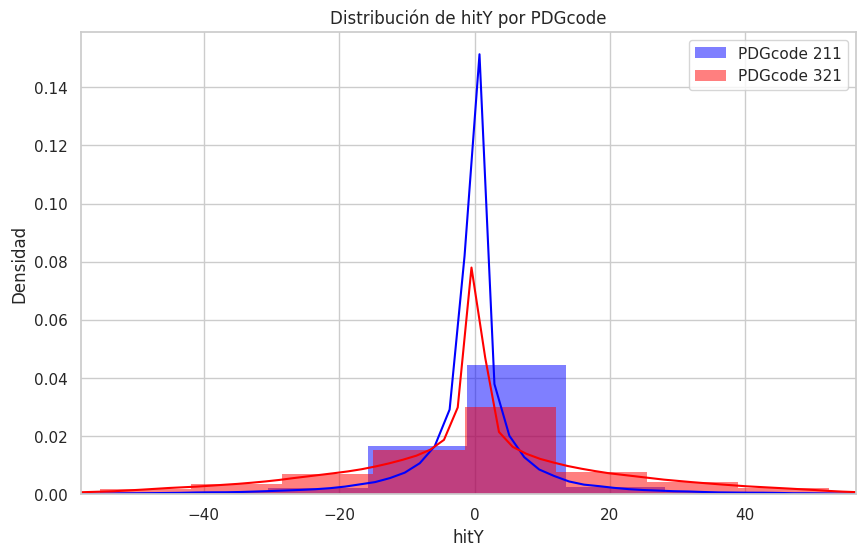

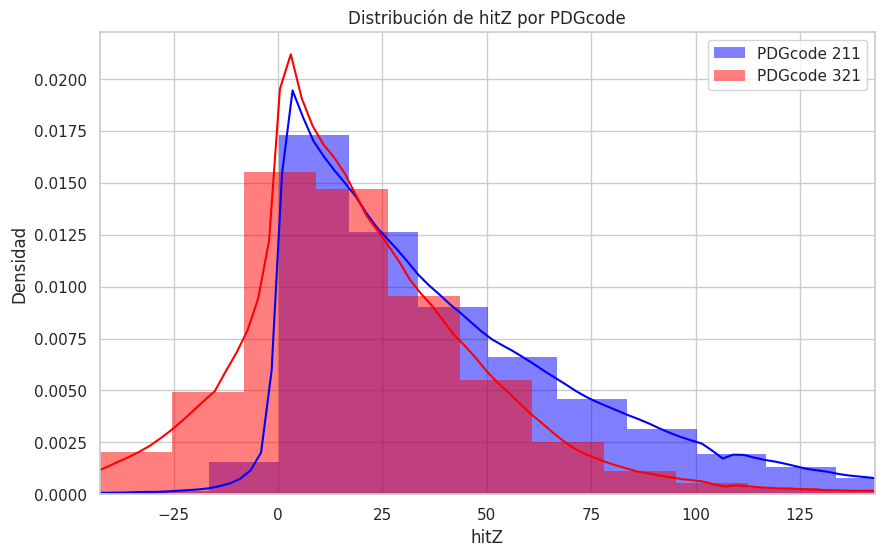

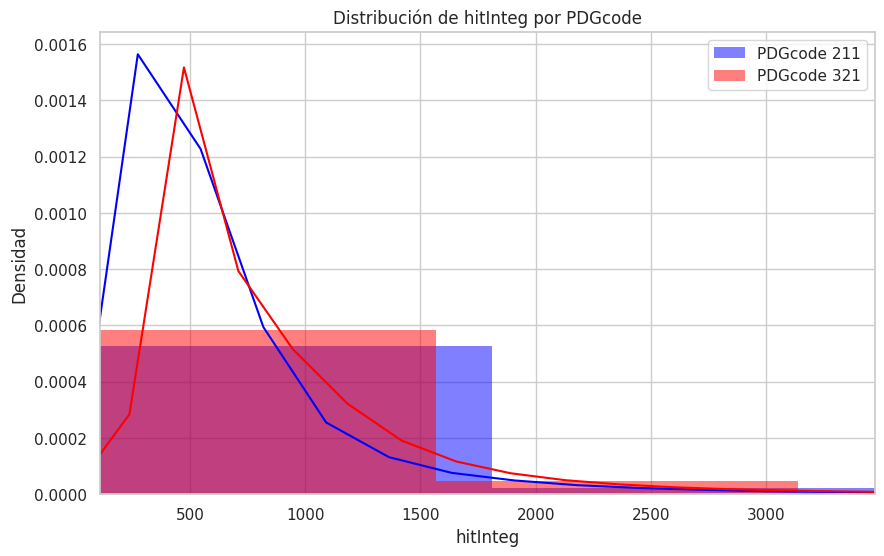

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar el dataframe por PDGcode
df_211 = df_train[df_train['PDGcode'] == 211]
df_321 = df_train[df_train['PDGcode'] == 321]

# Variables a visualizar
variables = ['hitX', 'hitY', 'hitZ', 'hitInteg']

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear las visualizaciones
for var in variables:
    plt.figure(figsize=(10, 6))

    # Calcular los percentiles 1 y 99 para establecer los límites del eje x
    low_percentile = np.percentile(df_train[var], 1)
    high_percentile = np.percentile(df_train[var], 99)

    # Gráfico para PDGcode = 211
    sns.histplot(df_211[var], color="blue", label="PDGcode 211", kde=True, stat="density", linewidth=0, bins=30)

    # Gráfico para PDGcode = 321
    sns.histplot(df_321[var], color="red", label="PDGcode 321", kde=True, stat="density", linewidth=0, bins=30)

    plt.title(f'Distribución de {var} por PDGcode')
    plt.xlabel(var)
    plt.ylabel('Densidad')

    # Ajustar los límites de los ejes dinámicamente
    plt.xlim(low_percentile, high_percentile)

    plt.legend()
    plt.show()


A continuación comentaremos las distribuciones de los datos en los dataFrame de train. Para ello veremos cada variable por separado. Antes de esto comentaremos que el $PDGcode = 211$ indicaria un pion, en cambio $PDGcode=321$ indicaria un kaon.

> **hitX**: En esta variable pordemos ver como en la parte central, cuando el valor de la variable tiende más a 0, vemos como se concentra una mayor parte de piones, en cambio a medida que se va separando, vamos encontrando más kaones. Esto quiere decir que el hits de los piones se produce más cercano a donde fue lanzada esa particula, en cambio el de los kaones se produce más lejano al punto donde fueron lanzados.

> **hitY**: Para el eje Y pasa lo mismo que en el eje X. Lo que viene a decir lo mismo, los hits de los piones se producen más cercanos al punto donde se produjo el experimento, mientras que a medida que nos vamos separando se encuentran más hits de kaones.

> **hitZ**: En el eje Z tiene un comportamiento distinto. Si el hits se ha producido en el rango de $(-∞,+20)$ hay más probabilidad de que la particula que vamos a predecir sea un kaons y si el hits se produce en el rango $(+20, +∞)$ hay más probabilidad de que sea un pions.

> **hitInteg**: En el caso de esta variable vemos como antes de que la magnitud de la variable sea 500 hay una mayor concentración de piones y a partir de 500 se estabilizan la cantidad de piones y kaones a medida que se incrementa el valor de la variable.





Como hemos visto en el valor de las variables hemos detectado un cierto patron en las posiciones de los hits en los ejes de coordenadas X,Y y Z. Por tanto, para ver un ejemplo en el espacio, vamos a representar 300 piones y 300 kaones en el eje de coordenadas, para ver como nuestro modelo pudiera llegar aprender un patrón para poder clasificar ambas variables.

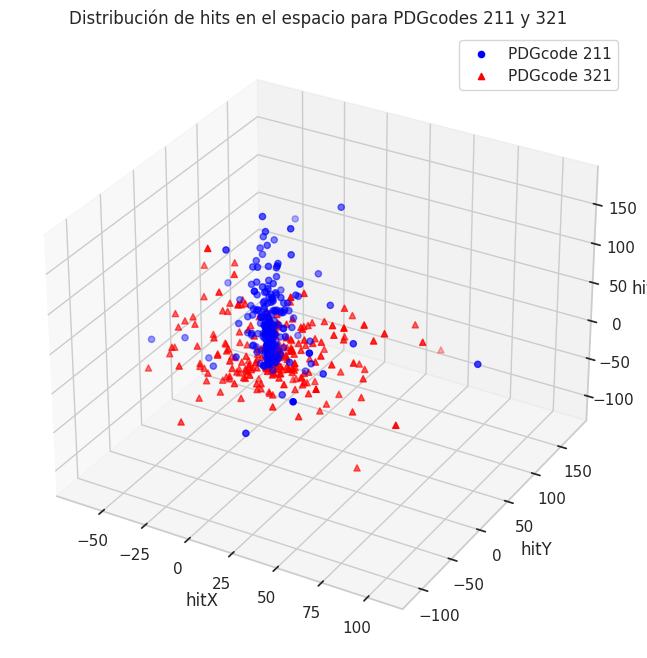

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Tomar 50 muestras aleatorias de cada dataframe
sample_211 = df_211[['hitX', 'hitY', 'hitZ']].sample(n=300, random_state=42)
sample_321 = df_321[['hitX', 'hitY', 'hitZ']].sample(n=300, random_state=42)

# Crear figura para la visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Agregar los puntos de cada muestra al gráfico
ax.scatter(sample_211['hitX'], sample_211['hitY'], sample_211['hitZ'], c='blue', marker='o', label='PDGcode 211')
ax.scatter(sample_321['hitX'], sample_321['hitY'], sample_321['hitZ'], c='red', marker='^', label='PDGcode 321')

# Etiquetas de los ejes
ax.set_xlabel('hitX')
ax.set_ylabel('hitY')
ax.set_zlabel('hitZ')

# Título y leyenda
plt.title('Distribución de hits en el espacio para PDGcodes 211 y 321')
ax.legend()

# Mostrar gráfico
plt.show()


Como podemos ver, las particulas de los piones tienden a estar más agrupadas en el espacio, mientras que las partículas de los kaones tienen un rango más amplio de variación en su distribución espacial.

In [8]:
df_train.columns

Index(['eventID', 'PDGcode', 'trueE', 'hitX', 'hitY', 'hitZ', 'hitTime',
       'hitInteg'],
      dtype='object')

De todas las columnas que se muestran en la celda anterior, solo nos quedaremos para la clasificación con `hitX`, `hitY`, `hitZ` y `hitInteg`. Por esa razón se eliminan el resto de celdas a continuación.

In [9]:
df_train = df_train.drop(['trueE'],axis=1)


In [10]:
df_train.columns

Index(['eventID', 'PDGcode', 'hitX', 'hitY', 'hitZ', 'hitTime', 'hitInteg'], dtype='object')

Para pasarle al clasificador los datos debemos de hacer por eventos, es decir, pasarle todos los hits de un evento y la etiqueta que corresponda.

In [11]:
# Suponiendo que df es tu DataFrame
conteo_hits = df_train['eventID'].value_counts()

# Para mostrar los resultados
print(conteo_hits)

6156     2406
16854    2393
8833     2376
19893    2270
13309    2219
         ... 
19440       8
12039       7
16952       7
2415        6
1822        5
Name: eventID, Length: 18055, dtype: int64


Como podemos ver, tenemos diversos numero de hits por eventos. Al clasificador debemos de pasarle lineas con el mismo numero de eventos. Por ese motivo, debemos de elegir un numero suficiente para representar el numero de hits que le pasaremos al clasificador, en nuestro caso ese numero vendrá representado por la variable $N$. En los casos en el que el evento tenga un número menor de hits que de $N$, rellenaremos los huecos con 0, y en el caso contrario, que el evento tenga mayor numero de hits que de $N$, dejaremos los hits donde el tiempo sea mayor, es decir, se hayan producido después. Habrá que jugar con el valor de la variable $N$ para que el modelo no entrene con datos obsoletos como puede ser valores con 0 y tampoco pierda información al respecto para la clasificación.


Para ello definiremos una función, que pasandole como argumentos un dataFrame, ya que puede servir para depurar los datos de train como los de validación o test, devuelva una matriz.

In [12]:
import pandas as pd

# Suponiendo que df es tu DataFrame y ya está cargado

# Filtrando el DataFrame para las filas donde eventID == 1 y PDGcode == 321
filtro = (df_train['eventID'] == 3) & (df_train['PDGcode'] == 321)

# Contando el número de filas que cumplen con el filtro
numero_hits = df_train[filtro].shape[0]

# Mostrando el resultado
print("El número exacto de hits para eventID=1 con PDGcode=321 es:", numero_hits)



El número exacto de hits para eventID=1 con PDGcode=321 es: 0


In [13]:
import pandas as pd

# Suponiendo que df es tu DataFrame

# Filtrando el DataFrame para las filas donde PDGcode == 321
df_filtrado = df_train[df_train['PDGcode'] == 321]

# Obteniendo los identificadores únicos de 'eventID' en el DataFrame filtrado
identificadores_unicos = df_filtrado['eventID'].unique()

# Mostrando los resultados
print(identificadores_unicos)
print(type(identificadores_unicos))


[    1     2     4 ... 19995 19996 19999]
<class 'numpy.ndarray'>


In [17]:
import numpy as np
import pandas as pd

def filtrado_datos(df, N):
    kaones = []
    labels = []

    df_sorted = df.sort_values(by=['eventID', 'hitTime'], ascending=[True, False])

    for eventID, grupo in df_sorted.groupby('eventID'):
        pdgCodes = grupo['PDGcode'].unique()

        for pdgCode in pdgCodes:
            grupo_filtrado = grupo[grupo['PDGcode'] == pdgCode]
            grupo_ordenado = grupo_filtrado.head(N)

            # Inicializar arrays para el padding
            hitX_padded = np.zeros(N)
            hitY_padded = np.zeros(N)
            hitZ_padded = np.zeros(N)
            hitInteg_padded = np.zeros(N)

            # Separar y aplicar padding a los valores de hitX, hitY, hitZ, hitInteg
            hitX_padded[:len(grupo_ordenado['hitX'])] = grupo_ordenado['hitX']
            hitY_padded[:len(grupo_ordenado['hitY'])] = grupo_ordenado['hitY']
            hitZ_padded[:len(grupo_ordenado['hitZ'])] = grupo_ordenado['hitZ']
            hitInteg_padded[:len(grupo_ordenado['hitInteg'])] = grupo_ordenado['hitInteg']

            # Concatenar los valores ya con el padding aplicado
            hit_values_reorganized = np.concatenate([hitX_padded, hitY_padded, hitZ_padded, hitInteg_padded])

            kaones.append(hit_values_reorganized)
            labels.append(pdgCode)

    return np.array(kaones), np.array(labels)


In [15]:
# Numero de hits por eventos que habrá dentro de las muestras
N = 20

In [18]:
matriz_train, etiquetas_train = filtrado_datos(df_train, N)

Para ver que es correcta la funcion `filtado_datos_concatenados`, el numero de identificadores únicos tiene que ser igual al numero de filas de la matriz que nos devuelve la funcion `filtado_datos_concatenados`.

In [19]:
print('Longitud de la matriz que nos devuelve:', len(matriz_train))
print('Numero de identificadores unicos en el dataset:', len(identificadores_unicos))
print('Numero de etiquetas:', len(etiquetas_train))

Longitud de la matriz que nos devuelve: 27615
Numero de identificadores unicos en el dataset: 13963
Numero de etiquetas: 27615


In [20]:
print('El numero de columnas por fila debe ser:', N*4)
print('El numero de columnas de la matriz es:', len(matriz_train[0]))


El numero de columnas por fila debe ser: 80
El numero de columnas de la matriz es: 80


In [21]:
print('Mostramos la primera fila para ver si tienen coherencia los resultados: ')
print(matriz_train[0])

Mostramos la primera fila para ver si tienen coherencia los resultados: 
[ 3.36069e+01  3.36069e+01  2.89403e+01  2.89349e+01  2.89180e+01
  2.89359e+01  2.89297e+01  2.07213e+01  2.06261e+01  2.03977e+01
  2.06250e+01  2.05471e+01  2.07298e+01  2.06111e+01  2.03675e+01
  1.34120e+01  1.34108e+01  1.34136e+01  1.25185e+01  1.24958e+01
 -6.61643e+01 -6.61643e+01 -6.48474e+01 -6.46742e+01 -6.45010e+01
 -6.47727e+01 -6.45995e+01 -4.57261e+01 -4.55529e+01 -4.52065e+01
 -4.55529e+01 -4.53797e+01 -4.57261e+01 -4.55529e+01 -4.52065e+01
 -3.23894e+01 -3.23894e+01 -3.23894e+01 -5.19612e-01 -5.19612e-01
 -1.14000e+01 -1.14000e+01 -1.60810e+01 -1.57810e+01 -1.54810e+01
 -1.55900e+01 -1.58900e+01 -1.19000e+01 -1.22000e+01 -1.24000e+01
 -1.22000e+01 -1.21000e+01 -1.19000e+01 -1.22000e+01 -1.24000e+01
 -1.52000e+01 -1.52000e+01 -1.52000e+01  7.84000e+01  7.82000e+01
  1.96033e+02  9.72541e+01  2.11893e+02  6.76366e+02  2.51312e+02
  4.46545e+02  6.78769e+02  3.87457e+02  7.37263e+02  4.93925e+02
  9

## Estudio de la distribución del número de hits por eventos

Como hemos visto el valor de la varaible $N$ en el estudio de nuestro problema es algo fundamental para poder entrenar con el mayor número de detalles, cuando el valor de la variable es mayor, pero a la vez si hacemos muy grande este valor, algunas columnas de nuestro dataset tendrán el valor de 0 en muchas de sus casillas.


A la vez, si intentamos reducir el valor de $N$ para evitar entrenar con valores nulos, podremos perder el detalle de las muestras.

Para ello en esta sección estudiaremos su distribución en el conjunto train para ver los mejores valores.

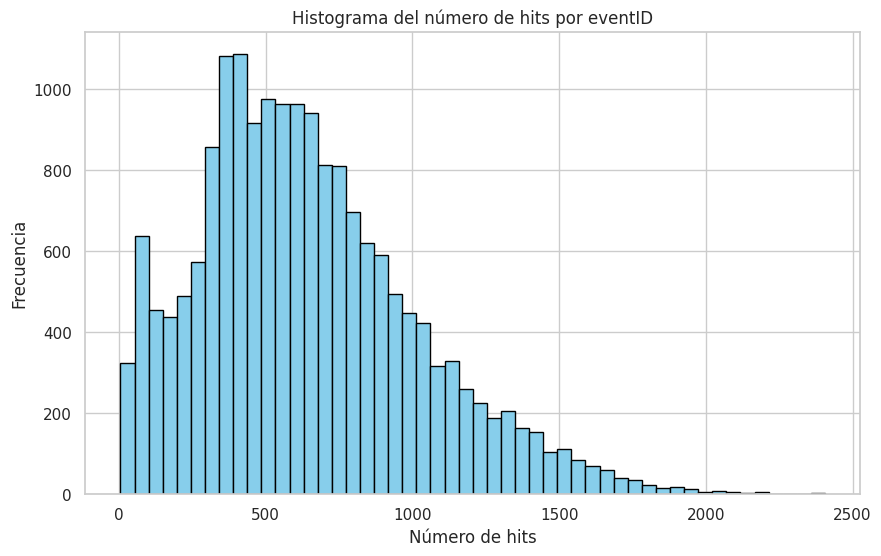

In [22]:
import matplotlib.pyplot as plt

# Suponiendo que conteo_hits es una Serie de Pandas que contiene el conteo de hits por eventID
# Histograma
plt.figure(figsize=(10, 6))
plt.hist(conteo_hits, bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma del número de hits por eventID')
plt.xlabel('Número de hits')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

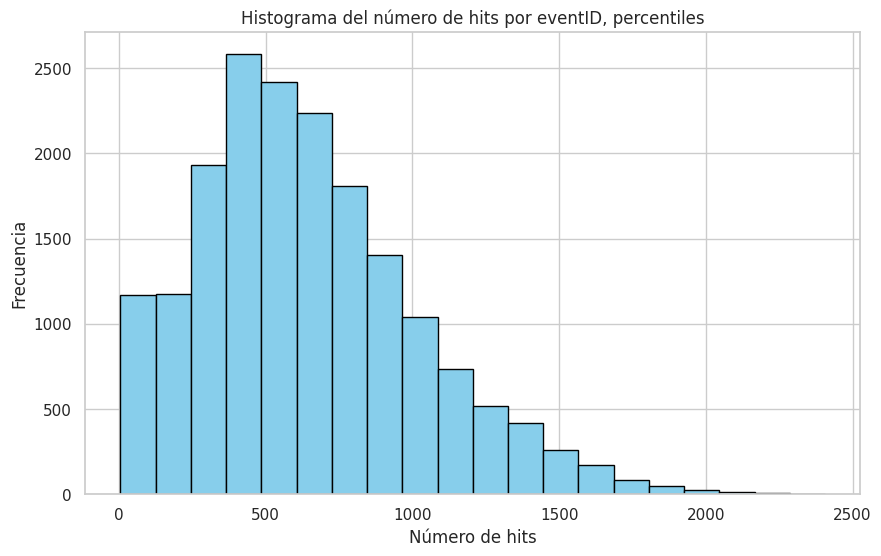

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(conteo_hits, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma del número de hits por eventID, percentiles')
plt.xlabel('Número de hits')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

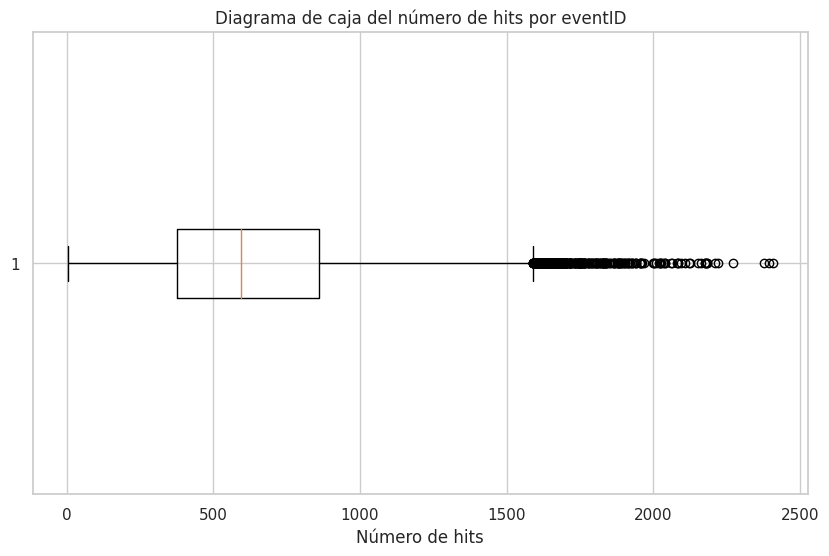

In [28]:
plt.figure(figsize=(10, 6))
plt.boxplot(conteo_hits, vert=False)
plt.title('Diagrama de caja del número de hits por eventID')
plt.xlabel('Número de hits')
plt.grid(True)
plt.show()

In [29]:
percentiles = [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
descripcion = conteo_hits.describe(percentiles=percentiles)

print(descripcion)

count    18055.000000
mean       643.176793
std        373.427678
min          5.000000
10%        191.000000
20%        333.000000
30%        413.000000
40%        502.000000
50%        593.000000
60%        684.000000
70%        793.000000
80%        937.000000
90%       1157.000000
95%       1355.000000
99%       1680.000000
max       2406.000000
Name: eventID, dtype: float64


>El histograma nos muestra una distribución que parece ser aprosimadamente normal con una ligera inclinación hacia la derecha, indicando que hay más eventos con un número menor de hits y menos eventos con un número muy alto de hits. El pico esta entorno a los 500 hits.

>En el diagrama de caja vemos como una mediana cernana a los 500 hits con algunos valores atipicos que se extienden hacia el mayor número de hits. La caja que representa el rango intercuartílico, es estrecha en comparación con la gama de datos que tenemos, lo que sugiere que la mayoria de los datos están concentrados alrededor de la mediana.

>En el estudio numerico vemos como los valores cercanos a la mediana representa un caso promedia tipico.

Como vemos sería aconsejable aproximar este valor de $N$ casos promedios donde se producen mayor número de hits. Una cifra bastante asequible para empezar el entrenamiento seria con un valor de N comprendido en el rango [400,800]. A medida que realicemos distintas prueblas con los modelos de clasificación acotaremos mucho más este valor.

## Desbalanceo de clases

En esta sección veremos si necesitamos tratar el desbalanceo de clases viendo el número de etiquetas que tenemos de kaones y de piones en train.

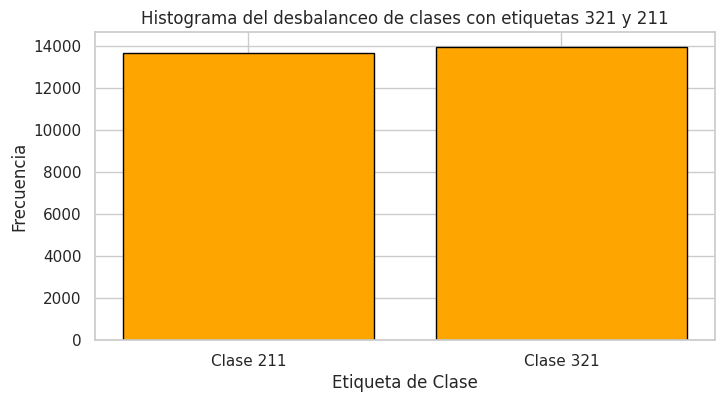

In [33]:
# Asumiendo que 'etiquetas_train' contiene las etiquetas 211 y 321
etiquetas, conteos = np.unique(etiquetas_train, return_counts=True)

# Convertir etiquetas a string para mejor visualización
etiquetas_str = [str(etiqueta) for etiqueta in etiquetas]

plt.figure(figsize=(8, 4))
plt.bar(etiquetas_str, conteos, color='orange', edgecolor='black')

# Etiquetas para el eje x y y
plt.xticks(etiquetas_str, ['Clase 211', 'Clase 321'])
plt.xlabel('Etiqueta de Clase')
plt.ylabel('Frecuencia')

# Título del gráfico
plt.title('Histograma del desbalanceo de clases con etiquetas 321 y 211')

# Mostrar el gráfico
plt.show()

Vemos como no se produce un desbalanceo de clases significativo. Nuestra muestra sugiere una distribución relativamente equitativa de las muestras entre clases. En la grafica podemos ver como se produce un equilibrio entre las clases lo cual ayuda a evitar sesgos hacia una clases específica durante el entrenamiento del modelo.

Dado el equilibrio en el numero de ejemplos de cada clase, no se considera necesario implementar tecnicas específicas de desbalanco de clases. Esto hace que nuestro proceso de entrenamiento esté más simplificado, ya que no hay que realizar "oversampling", "undersampling", entre otras técnicas. Esto hace que entrenemos con datos reales y no haya riesgo de introducir sesgos adicionales.

Así el modelo podrá aprender características más representativas de todas las clases sin una influencia desproprocionada en particular.

Para entrenamientos futuros hay que considerar volver a mostrar esta matriz de desbalanceo de clases ya que los datos pueden cambiar y presentar un desbalanceo. Mantener este proceso de revisión y ajuste basado en la composición del conjunto de datos asegura la robustez y adaptabilidad del modelo.
